In [1]:
#Libraries Used
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


## Metrics :

Total revenue generated: We can calculate the total revenue generated by multiplying the quantity of each item by its price and summing up the results for all orders.

Best-selling item: We can determine the best-selling item by aggregating the quantity sold for each model number and sorting the results in descending order.

Sales by manufacturer: We can group the data by manufacturer and calculate the total revenue generated by each manufacturer.

Average price per item: We can calculate the average price per item by dividing the total revenue generated by the total quantity sold.

Sales trends over time: If we have additional information such as the date of each order, we can analyze sales trends over time by grouping the data by date and aggregating the total revenue generated for each date.

------------------------------------------------------

Sales by region: If we have information about the region where each order was placed, we can group the data by region and calculate the total revenue generated by each region. This can help us identify regions with high or low sales and potentially adjust our marketing or sales strategy accordingly.

Seasonal sales trends: If we have information about the time of year when each order was placed, we can analyze seasonal sales trends by grouping the data by season (e.g. spring, summer, fall, winter) and aggregating the total revenue generated for each season. This can help us identify patterns in consumer behavior and adjust our inventory or pricing strategy accordingly.

Sales by channel: If we have information about the channel through which each order was placed (e.g. online, in-store, phone), we can group the data by channel and calculate the total revenue generated by each channel. This can help us identify which channels are most effective for generating sales and potentially adjust our resources or strategy accordingly.

Profit margins: We can calculate the profit margin for each item by subtracting the cost of the item (if available) from its price and dividing the result by the price. We can then calculate the average profit margin across all items to assess the overall profitability of our product line.

Customer demographics: If we have information about the demographics of our customers (e.g. age, gender, location), we can analyze sales trends and preferences by demographic group. This can help us tailor our product offerings and marketing strategy to better meet the needs and preferences of different customer segments.

--------------------------------------------------------


Sales by salesperson: If we have information about the salesperson responsible for each order, we can group the data by salesperson and calculate the total revenue generated by each salesperson. This can help us identify high-performing salespeople and potentially adjust our sales incentive or training programs accordingly.

Sales by customer type: If we have information about the type of customer (e.g. individual consumer, small business, large corporation) who placed each order, we can analyze sales trends and preferences by customer type. This can help us tailor our marketing and sales strategy to better meet the needs of different types of customers.
Product performance analysis: We can analyze the performance of individual products by calculating their sales volume, revenue, and profitability. This can help us identify products that are underperforming or overperforming and adjust our product strategy accordingly.

Price sensitivity analysis: We can analyze the relationship between price and sales volume by calculating the elasticity of demand for each product. This can help us identify the optimal price point for each product and potentially adjust our pricing strategy to maximize revenue and profitability.

Order fulfillment analysis: We can analyze the time it takes to fulfill each order (i.e. from the time the order is placed to the time it is delivered) to identify bottlenecks or inefficiencies in our order fulfillment process. This can help us improve our operational efficiency and customer satisfaction.


--------------------------------------------------------------


Sales by product category: If we have information about the product category (e.g. electronics, appliances, clothing) for each item, we can group the data by category and calculate the total revenue generated by each category. This can help us identify high-performing product categories and potentially adjust our product offerings or marketing strategy to focus on these categories.

Customer retention analysis: We can analyze the percentage of customers who place repeat orders with us and identify patterns in their ordering behavior. This can help us develop strategies to improve customer retention and loyalty.

Inventory management analysis: We can analyze our inventory levels and identify products that are overstocked or understocked. This can help us optimize our inventory management strategy and avoid stockouts or overstocking.

Marketing campaign analysis: If we have information about the marketing campaigns we have run (e.g. email campaigns, social media ads), we can analyze the impact of these campaigns on sales volume and revenue. This can help us identify the most effective marketing channels and messages and adjust our marketing strategy accordingly.
Competitor analysis: We can compare our sales performance to that of our competitors and identify areas where we may be losing market share. This can help us develop strategies to differentiate ourselves from our competitors and regain market share.


## Time Series for Orders Createds (2004 - 2023)

In [3]:
# Working on a Time Series for Order created from Year 2005 to Year 2023

In [4]:
#Introducing in a new set of dataset that consist of the Order_Date_time
df_date_event = pd.read_csv('Order_Date.csv')
df_date_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75194 entries, 0 to 75193
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HistoryID  75194 non-null  int64 
 1   OrderID    75194 non-null  int64 
 2   Event      75194 non-null  object
 3   DateTime   75194 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [5]:
df_date = df_date_event[['OrderID', 'DateTime']]
df_dateTime = pd.DataFrame(df_date)
df_dateTime['DateTime'] = pd.to_datetime(df_date['DateTime'])
#Extract Year, Date and month from DateTime
df_dateTime['Date'] = df_dateTime['DateTime'].dt.date
df_dated = df_dateTime[['OrderID', 'Date']]
print(df_dated)

       OrderID        Date
0         2002  2005-04-07
1         2003  2005-04-07
2         2005  2005-04-07
3         2004  2005-04-07
4         2009  2005-04-08
...        ...         ...
75189    57253  2023-04-06
75190    57251  2023-04-06
75191    57240  2023-04-06
75192    57247  2023-04-07
75193    57254  2023-04-07

[75194 rows x 2 columns]


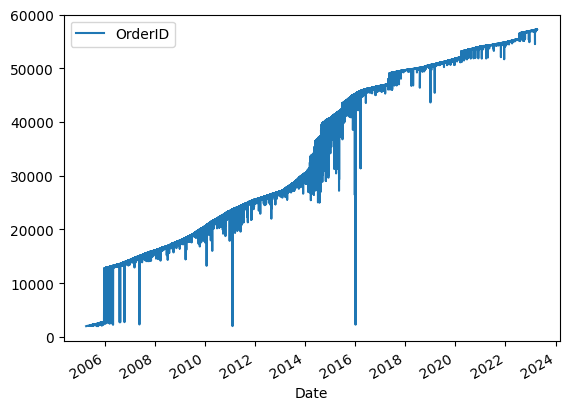

In [6]:
df_main = pd.DataFrame(df_dated)

# Convert the 'date' column to datetime type
df_main['Date']=pd.to_datetime(df_main['Date'])

#
df_main.set_index('Date', inplace=True)

# Plot the time series
df_main.plot()

#Show plot
plt.show()

## Time Series :

In [7]:
#The chart above shows consistent growth in Orders created 
## We see there's a huge drop around 2016, 2011 and 2007.

## Order Stats Info.

In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_OrderStatus = pd.read_csv('Order_Status.csv')
UniqueC = df_OrderStatus['OrderStatusID'].value_counts()
df_OrderStat = pd.DataFrame({'OrderStatusID': UniqueC.index, 
                    'counts':UniqueC.values})

print(df_OrderStat)

    OrderStatusID  counts
0               7   22221
1               8   10030
2               2    5472
3               5    5130
4               1     208
5               4     176
6              10     157
7               3      45
8              11      20
9               9      17
10              6       5


In [10]:
#Combining the Legacy for StatusID tabele with the new table above;
df_OrderStatusID = pd.read_csv('OrderStatusID.csv')
df_OrderStatInfo = pd.merge(df_OrderStat, df_OrderStatusID, on='OrderStatusID')
print(df_OrderStatInfo)

    OrderStatusID  counts         OrderStatus
0               7   22221  Shipment Completed
1               8   10030            ARCHIVED
2               2    5472              Closed
3               5    5130           Cancelled
4               1     208                Open
5               4     176           Confirmed
6              10     157        Acknowledged
7               3      45   Partially Shipped
8              11      20            Sourcing
9               9      17           Pro Forma
10              6       5         Credit Hold


## Sales by region
#Sales by region: If we have information about the region where each order was placed, we can group the data by region and calculate the total revenue generated by each region. This can help us identify regions with high or low sales and potentially adjust our marketing or sales strategy accordingly.

In [11]:
df_OrderComLoc = pd.read_csv('OrderCompanyLocation.csv') #importing dataset of OrderCompanyLocation
df_OrderComLoc.info()
print('')
print('')
# Filter out Orders that were cancelled and close
## Then, merge the Dataframes by their OrderID
df_OrderStatus.info()
print('')
print('')
print('<<<<***Order Completed or waiting to be processed***>>>>')
# Drop the rows where 'OrderStatusID' has value '2' or '5'
df_OrderClear = df_OrderStatus[(df_OrderStatus['OrderStatusID'] != 2) & (df_OrderStatus['OrderStatusID'] != 5)]
print(df_OrderClear)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43382 entries, 0 to 43381
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OrderID                 43382 non-null  int64  
 1   FirstName               43348 non-null  object 
 2   LastName                43036 non-null  object 
 3   Company                 40778 non-null  object 
 4   PONumber                18309 non-null  object 
 5   PhoneNumber             42217 non-null  object 
 6   Ext                     3541 non-null   object 
 7   MobilePhone             1512 non-null   object 
 8   FaxNumber               1957 non-null   object 
 9   EmailAddress            42956 non-null  object 
 10  Address1                33732 non-null  object 
 11  Address2                9097 non-null   object 
 12  Address3                1338 non-null   object 
 13  City                    33558 non-null  object 
 14  StateProv               32827 non-null

In [12]:
#Merge df_OrderClear with df_OrderComLoc on OrderID with exception of OrderID Value that are not in df_OrderClear
df_OrderComLoc_filtered = df_OrderComLoc[df_OrderComLoc['OrderID'].isin(df_OrderClear['OrderID'])]

# Merge the two dataframes on OrderID
merged_df = pd.merge(df_OrderClear, df_OrderComLoc_filtered, on='OrderID', how='inner')
merged_df.info()
Refined_OrderLoc = merged_df.drop(['SalesPersonID', 'FirstName', 'LastName', 'PONumber', 'PhoneNumber', 'Ext', 'MobilePhone', 'FaxNumber', 'EmailAddress', 'Address1', 'Address2', 'Address3', 'BillingMethodID', 'CreditApprovedStatusID', 'TermsSetBy', 'VerifiedBy', 'VerifiedDate'], axis=1)
print('')
print('')
print('New Dataset i can upload to Git or public repo')
print(Refined_OrderLoc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32781 entries, 0 to 32780
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OrderID                 32781 non-null  int64  
 1   OrderStatusID           32781 non-null  int64  
 2   SalesPersonID           32754 non-null  float64
 3   FirstName               32753 non-null  object 
 4   LastName                32460 non-null  object 
 5   Company                 30362 non-null  object 
 6   PONumber                12815 non-null  object 
 7   PhoneNumber             32007 non-null  object 
 8   Ext                     2637 non-null   object 
 9   MobilePhone             987 non-null    object 
 10  FaxNumber               1284 non-null   object 
 11  EmailAddress            32616 non-null  object 
 12  Address1                23908 non-null  object 
 13  Address2                6501 non-null   object 
 14  Address3                987 non-null  

In [13]:
#Refined_OrderLoc.to_csv('Refined_OrderLoc.csv', index=False) # Save to .csv
Uni_C = Refined_OrderLoc['StateProv'].value_counts()
df_Refined = pd.DataFrame({'StateProv': Uni_C.index, 
                    'counts':Uni_C.values})
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_Refined['StateProv'] = df_Refined['StateProv'].map(state_dict).fillna(df_Refined['StateProv'])
#filtering out values that are not in the state_dict 
mask = df_Refined['StateProv'].isin(state_dict.values())

# filter the DataFrame using the mask
df_Refined = df_Refined[mask]
#Add up duplicates in 'StateProv'
df_usa = df_Refined.groupby('StateProv')['counts'].sum().reset_index()
df_usa.to_csv('df_usa.csv', index=False)

print(df_usa)
print('')
print('')
print(' This is the counts of Orders in Vox by States in the United States')

   StateProv  counts
0         AK      54
1         AL     455
2         AR     124
3         AZ     349
4         CA    2100
5         CO     347
6         CT     181
7         DE      40
8         FL    1128
9         GA     419
10        HI      61
11        IA     181
12        ID      80
13        IL     646
14        IN     398
15        KS     114
16        KY     215
17        LA     334
18        MA     446
19        MD     399
20        ME      55
21        MI     699
22        MN     376
23        MO     342
24        MS     109
25        MT      30
26        NC     499
27        ND      49
28        NE      97
29        NH     149
30        NJ     562
31        NM     130
32        NV     153
33        NY     878
34        OH     807
35        OK     234
36        OR     215
37        PA     788
38        RI      54
39        SC     237
40        SD      44
41        TN     346
42        TX    2256
43        UT     154
44        VA     555
45        VT      38
46        WA 

## Sales by salesperson:
If we have information about the salesperson responsible for each order, we can group the data by salesperson and calculate the total revenue generated by each salesperson. This can help us identify high-performing salespeople and potentially adjust our sales incentive or training programs accordingly.

In [14]:
df_Sales = pd.read_csv('Results.csv')
df_Sales.info()
df_OrderStatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48446 entries, 0 to 48445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LineItemID         48446 non-null  int64  
 1   OrderID            48446 non-null  int64  
 2   ItemID             48359 non-null  float64
 3   PartNumber         48343 non-null  object 
 4   ModelNumber        48426 non-null  object 
 5   Make               47997 non-null  object 
 6   Description        48340 non-null  object 
 7   Qty                48446 non-null  int64  
 8   QtyDecimalPart     48446 non-null  int64  
 9   QtyDecimal         48446 non-null  float64
 10  Price              48446 non-null  float64
 11  ShippingDateID     1006 non-null   float64
 12  Notes              9918 non-null   object 
 13  AcceptReplacement  35969 non-null  float64
 14  ItemConditionID    27022 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 5.5+ MB
<class 'panda

In [15]:
df_OrderPriced = df_Sales.drop(['LineItemID', 'ItemID', 'PartNumber', 'Make', 'Description', 'QtyDecimalPart', 'QtyDecimal', 'ShippingDateID', 'Notes', 'AcceptReplacement', 'ItemConditionID'], axis=1)
df_OrderPriced['ItemPrice'] = df_OrderPriced['Price'] * df_OrderPriced['Qty']
df_orderPrice = df_OrderPriced.drop(['ModelNumber', 'Qty', 'Price'], axis=1) #droping some col.
df_sumPrice = df_orderPrice.groupby('OrderID', as_index=False)['ItemPrice'].sum() #merging duplicate in OrderID and suming them up with their ind price
## Merging df_OrderClear with df_sumPrice on Col. 'OrderID', not including OrderID values that is not in df_OrderClear
df_SaleRev = pd.merge(df_OrderClear, df_sumPrice, on='OrderID', how='inner')
print(df_SaleRev)

       OrderID  OrderStatusID  SalesPersonID  ItemPrice
0         2024              8         1016.0    1370.00
1         2045              8         1017.0     139.50
2         2077              7         1408.0    1770.75
3         2079              8         1016.0     334.50
4         2100              7         1408.0    1213.50
...        ...            ...            ...        ...
25494    57234              7       482417.0    2218.00
25495    57235              7       427621.0    1116.00
25496    57236              7        92576.0    2900.00
25497    57237              7       463447.0     495.00
25498    57238             10        92576.0    1850.00

[25499 rows x 4 columns]


In [16]:
#Merge with df_dated 

In [23]:
df_dated.info()
print('')
# group the dataframe by column "OrderID"
# create a new dataframe by aggregating the values in each group
grouped_df = df_dated.groupby(['OrderID']).size().reset_index(name='Count')

#df_SaleDated = pd.merge(df_SaleRev, df_dated, on='OrderID', how='inner')
#df_SaleDated.to_csv()
print(grouped_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75194 entries, 0 to 75193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   OrderID  75194 non-null  int64         
 1   Date     75194 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 MB

       OrderID  Count
0         2002      1
1         2003      1
2         2004      2
3         2005      1
4         2008      9
...        ...    ...
32480    57248      1
32481    57251      1
32482    57252      1
32483    57253      2
32484    57254      1

[32485 rows x 2 columns]


In [ ]:
#Merge df_SaleDated on col. 'OrderID' 
df_SaleDated['OrderID'] = df_SaleDated['OrderID'].drop_duplicates()
df_SaleDated.info()

## Top Item Ordered

In [40]:
Dataframe_x1 = pd.read_csv('Results.csv')
Dataframe_x1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48446 entries, 0 to 48445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LineItemID         48446 non-null  int64  
 1   OrderID            48446 non-null  int64  
 2   ItemID             48359 non-null  float64
 3   PartNumber         48343 non-null  object 
 4   ModelNumber        48426 non-null  object 
 5   Make               47997 non-null  object 
 6   Description        48340 non-null  object 
 7   Qty                48446 non-null  int64  
 8   QtyDecimalPart     48446 non-null  int64  
 9   QtyDecimal         48446 non-null  float64
 10  Price              48446 non-null  float64
 11  ShippingDateID     1006 non-null   float64
 12  Notes              9918 non-null   object 
 13  AcceptReplacement  35969 non-null  float64
 14  ItemConditionID    27022 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 5.5+ MB


In [165]:
df_OrderItem = Dataframe_x1[['OrderID', 'ModelNumber', 'Make', 'Qty', 'Price']]
df_OrderItem.tail()


,OrderID,ModelNumber,Make,Qty,Price
48441,57235,YP00565,PACIFIC SCIENTIFIC,12,93.0
48442,57236,800H-FPX6A1,ALLEN-BRADLEY,2,1450.0
48443,57237,221016-C,FMC,1,495.0
48444,57238,20457-3-24,VASTER CABLES,5,195.0
48445,57238,20457-2-18,VASTER CABLES,5,175.0


In [168]:
UniqueCount = df_OrderItem['ModelNumber'].value_counts()
df_OrderLine = pd.DataFrame({'PartNumber': UniqueCount.index, 
                    'counts':UniqueCount.values})

print(df_OrderLine)

               PartNumber  counts
0                ACE-R30A    2702
1               VoxShield    2575
2           ACE-R30AP230V    1250
3               ACE-1010A     762
4                 VTC0012     461
...                   ...     ...
21009          VT1150-D32       1
21010      SDN2.5-24-100P       1
21011      SDN-2.5-20-RED       1
21012  IPC-610-BTO-218971       1
21013          20457-2-18       1

[21014 rows x 2 columns]


In [ ]:
#The above Dataframe has in the order of highest appearance on order created for an item and the total count
##Next, we are going to us this dataframe to use this data frame to get the total qty of order for each item to be able to aquire the the scope of most order item.

In [172]:
total_count = df_OrderItem.groupby('ModelNumber')['Qty'].sum().reset_index()
print(total_count)

                ModelNumber  Qty
0               \t 94256201   50
1                   \t H308   24
2             \t VTC1365464    2
3                 \t4066000    1
4                  \tVTC282    9
...                     ...  ...
21009  sms15000116 - REPAIR    1
21010           sno2005-115    2
21011       test-2011-01-12    1
21012              uHP-2020    6
21013        v7807 - REPAIR    1

[21014 rows x 2 columns]


In [195]:
#Sorting out the ModelNumbers in the Order of 'Highest Order Created for each individual key values of ModelNumber'
sorted_df = total_count.sort_values(by='Qty', ascending=False)
print(sorted_df.head(25))

             ModelNumber     Qty
6602            ACE-723C  225000
20276      Verve Keyring   51955
14754        OV05620C03A   35000
10960          G4A01144C   22000
18027            SMP11GS   20000
16471          Product A   10000
16472          Product B   10000
2230         25116012002   10000
16127             PS-250    9000
6701            ACE-R30A    8101
6606           ACE-815AP    7801
19009            TP100AU    7094
13291    MAX1974EUB+TG05    6000
8542      CM3312R111R-10    5000
169          0115.116.07    5000
1422         161-1300-EX    4500
20282          VoxShield    4117
6657            ACE-890C    4019
8916   CS20-5.000MABJ-UT    4000
11030    GE28F640W18BD60    4000
14683             OP140A    4000
14561           NWSLC-2Y    3600
8670       CPDT6-24V4-HF    3000
10504            F605130    2995
91       002K51-31341-24    2781


In [208]:
# CASE 2.A
# Categorizing Order Line Item
##getting the ModelNumber, Description

In [210]:
87 zß Dataframe_x1[['ModelNumber', 'Description']]
df_CategorizedMain['Description'].fillna('Others')


0                   4 channels video capture card (30 FPS)
1              GBIC 1000Base-SX,Extended MM, 1310nm, 2km. 
2              60 Watt DC/DC Converters Din Rail Mountable
3        US70 Series, Universal Input, 70 Watt Switcher...
4        Socket 370 base CPU Card with LAN, VGA, and Au...
                               ...                        
48441    Pacific Scientific YP00565 Brush | for PMDC Mo...
48442    Allen-Bradley 800H-FPX6A1 Pushbutton | Hazardo...
48443                        FMC 221016-C - SCR Controller
48444    Vaster Cables 20457-3-24 Hard Drive Data Cable...
48445    Vaster Cables 20457-2-18 Hard Drive Data Cable...
Name: Description, Length: 48446, dtype: object

In [ ]:
x = 'HiCORE-i6320'
total_count = df_OrderItem.loc[df_OrderItem['ModelNumber'] == x, 'Qty'].sum()
print(total_count)

